## ЗАНЯТИЕ 16.05.2022

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv('UnitedKingdom.csv', index_col=0, parse_dates=True)

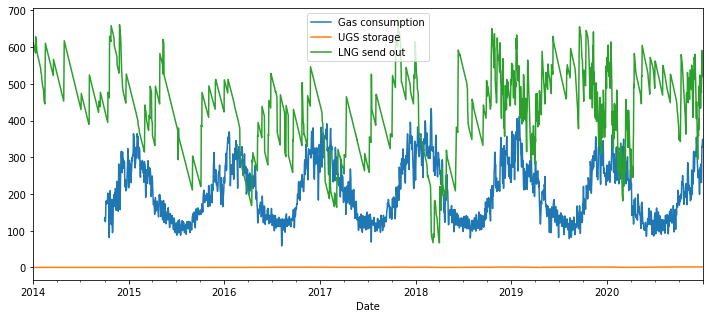

In [4]:
data.plot(figsize=(12,5))
plt.show()

In [26]:
data

,Gas consumption,UGS storage,LNG send out
Date,,,
2014-01-01,NaN,0.178547,612.923160
2014-01-02,NaN,0.188001,609.684587
2014-01-03,NaN,0.193733,606.439351
2014-01-04,NaN,0.193733,603.194115
2014-01-05,NaN,0.189011,599.962206
...,...,...,...
2020-12-27,254.908453,1.454552,515.132932
2020-12-28,329.111672,1.407907,590.799578
2020-12-29,328.514920,1.372570,550.150829


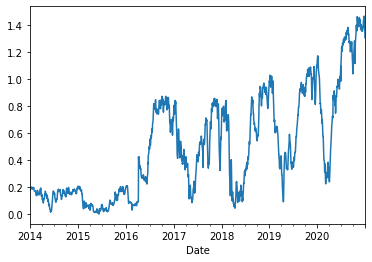

In [27]:
data['UGS storage'].plot()

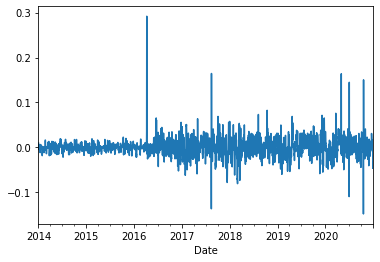

In [28]:
data['UGS storage'].diff().plot()

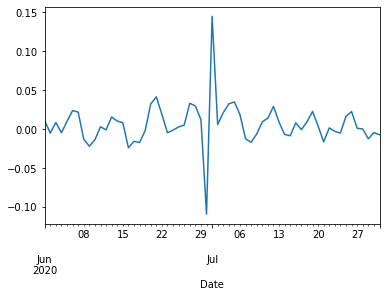

In [29]:
data['UGS storage'].diff().loc['2020-06':'2020-07'].plot()

убрать все до 16го года, избавиться от выбросов (interpolate)

In [30]:
data1 = data['UGS storage'].diff()

In [31]:
data1 = data1['2016-01-01':]
data1

Date
2016-01-01    0.005966
2016-01-02    0.006743
2016-01-03    0.004207
2016-01-04    0.000000
2016-01-05    0.000175
                ...   
2020-12-27   -0.011134
2020-12-28   -0.046646
2020-12-29   -0.035336
2020-12-30   -0.032810
2020-12-31   -0.033947
Name: UGS storage, Length: 1827, dtype: float64

In [32]:
data1.loc[(np.abs(data1) > 0.1)] = np.nan

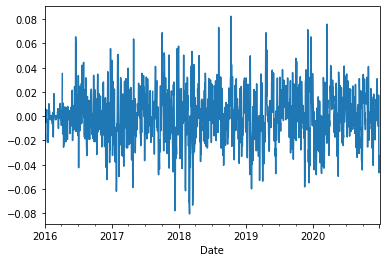

In [33]:
data1.plot()

In [34]:
data1

Date
2016-01-01    0.005966
2016-01-02    0.006743
2016-01-03    0.004207
2016-01-04    0.000000
2016-01-05    0.000175
                ...   
2020-12-27   -0.011134
2020-12-28   -0.046646
2020-12-29   -0.035336
2020-12-30   -0.032810
2020-12-31   -0.033947
Name: UGS storage, Length: 1827, dtype: float64

In [76]:
df = pd.read_excel('Mean temperature UK.xlsx', index_col=0, parse_dates=True)

In [77]:
df = df['2016-01-01':'2020-12-31']

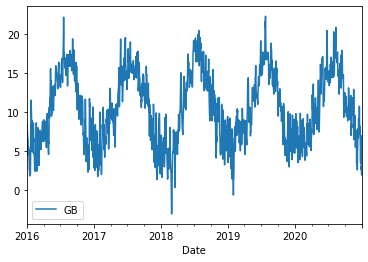

In [78]:
df.plot()

In [79]:
df

,GB
Date,
2016-01-01,5.20
2016-01-02,8.44
2016-01-03,7.50
2016-01-04,7.08
2016-01-05,6.75
...,...
2020-12-27,4.22
2020-12-28,2.62
2020-12-29,3.06


In [80]:
df['diff'] = data1

In [81]:
df

,GB,diff
Date,,
2016-01-01,5.20,0.005966
2016-01-02,8.44,0.006743
2016-01-03,7.50,0.004207
2016-01-04,7.08,0.000000
2016-01-05,6.75,0.000175
...,...,...
2020-12-27,4.22,-0.011134
2020-12-28,2.62,-0.046646
2020-12-29,3.06,-0.035336


In [82]:
df['diff'] = df['diff'].interpolate()

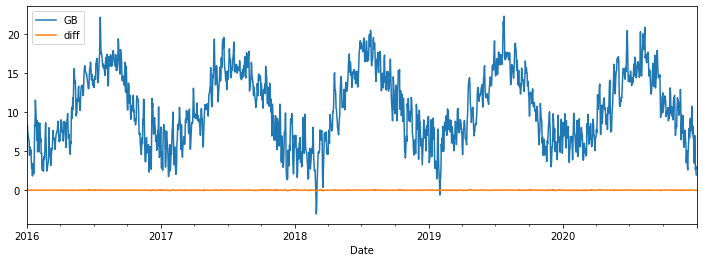

In [83]:
df.plot(figsize=(12,4))

In [84]:
from fbprophet import Prophet

In [85]:
df.head()

,GB,diff
Date,,
2016-01-01,5.20,0.005966
2016-01-02,8.44,0.006743
2016-01-03,7.50,0.004207
2016-01-04,7.08,0.000000
2016-01-05,6.75,0.000175


In [86]:
df_prophet = df[['diff', 'GB']]
df_prophet = df_prophet.reset_index()
df_prophet.columns = ['ds', 'y', 'GB']

In [87]:
df_prophet.head()

,ds,y,GB
0,2016-01-01,0.005966,5.20
1,2016-01-02,0.006743,8.44
2,2016-01-03,0.004207,7.50
3,2016-01-04,0.000000,7.08
4,2016-01-05,0.000175,6.75


In [106]:
a = df_prophet.loc[:1795]

In [109]:
b = df_prophet.loc[1796:]

In [108]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.add_regressor('GB')
model.fit(a)

In [101]:
future = model.make_future_dataframe(periods=36, freq='MS')

In [102]:
# future = model.make_future_dataframe(periods=36, freq='MS')
# future['GB'] = future['ds']
forecast = model.predict(b)

In [103]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
19,2020-12-20,0.005920,-0.016513,0.029448
20,2020-12-21,0.011686,-0.011712,0.034456
21,2020-12-22,0.007072,-0.015384,0.030194
22,2020-12-23,0.007666,-0.016717,0.030643
23,2020-12-24,-0.002301,-0.024079,0.021719
24,2020-12-25,-0.002659,-0.024913,0.020334
25,2020-12-26,0.012957,-0.011638,0.036048
26,2020-12-27,0.002164,-0.019692,0.023832
27,2020-12-28,-0.003935,-0.027745,0.019091
28,2020-12-29,-0.001847,-0.024005,0.022700


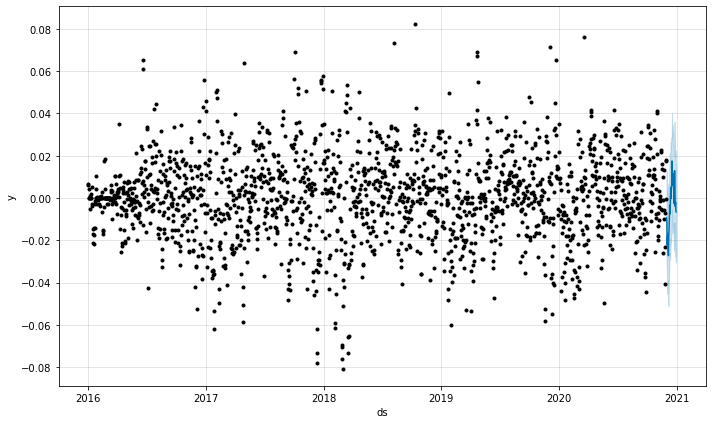

In [104]:
model.plot(forecast)
plt.show()